In [1]:
# (Q1) Find the 10 countries with the most projects

# Import necessary modules
import pandas as pd
import matplotlib.pyplot as plt
import json
from pandas.io.json import json_normalize

In [2]:
# Load/Open json file as a string
data = json.load((open('Downloads/data_wrangling_json/data/world_bank_projects.json')))

In [3]:
# Read in json file as a Pandas df
json_df = pd.read_json('Downloads/data_wrangling_json/data/world_bank_projects.json')

In [4]:
# Inspect the dataframe
json_df.columns

Index(['_id', 'approvalfy', 'board_approval_month', 'boardapprovaldate',
       'borrower', 'closingdate', 'country_namecode', 'countrycode',
       'countryname', 'countryshortname', 'docty', 'envassesmentcategorycode',
       'grantamt', 'ibrdcommamt', 'id', 'idacommamt', 'impagency',
       'lendinginstr', 'lendinginstrtype', 'lendprojectcost',
       'majorsector_percent', 'mjsector_namecode', 'mjtheme',
       'mjtheme_namecode', 'mjthemecode', 'prodline', 'prodlinetext',
       'productlinetype', 'project_abstract', 'project_name', 'projectdocs',
       'projectfinancialtype', 'projectstatusdisplay', 'regionname', 'sector',
       'sector1', 'sector2', 'sector3', 'sector4', 'sector_namecode',
       'sectorcode', 'source', 'status', 'supplementprojectflg', 'theme1',
       'theme_namecode', 'themecode', 'totalamt', 'totalcommamt', 'url'],
      dtype='object')

In [5]:
json_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 50 columns):
_id                         500 non-null object
approvalfy                  500 non-null int64
board_approval_month        500 non-null object
boardapprovaldate           500 non-null object
borrower                    485 non-null object
closingdate                 370 non-null object
country_namecode            500 non-null object
countrycode                 500 non-null object
countryname                 500 non-null object
countryshortname            500 non-null object
docty                       446 non-null object
envassesmentcategorycode    430 non-null object
grantamt                    500 non-null int64
ibrdcommamt                 500 non-null int64
id                          500 non-null object
idacommamt                  500 non-null int64
impagency                   472 non-null object
lendinginstr                495 non-null object
lendinginstrtype            495 non

In [6]:
# See how many distinct countries are listed
json_df.countryname.value_counts(dropna=False)

People's Republic of China                  19
Republic of Indonesia                       19
Socialist Republic of Vietnam               17
Republic of India                           16
Republic of Yemen                           13
People's Republic of Bangladesh             12
Nepal                                       12
Kingdom of Morocco                          12
Republic of Mozambique                      11
Africa                                      11
Islamic Republic of Pakistan                 9
Federative Republic of Brazil                9
Burkina Faso                                 9
Republic of Armenia                          8
Republic of Tajikistan                       8
United Republic of Tanzania                  8
Lao People's Democratic Republic             7
Kyrgyz Republic                              7
Federal Republic of Nigeria                  7
Hashemite Kingdom of Jordan                  7
Republic of Peru                             6
West Bank and

In [7]:
# See how many distinct projects there are
json_df.project_name.value_counts(dropna=False)

MH:  First ICT Sector Development Operation                                                                 1
Additional Financing for Cash Transfers for Orphans and Vulnerable Children                                 1
Support to Uruguayan Public Schools Project                                                                 1
Urban Local Government Strengthening Program                                                                1
Emergency Infrastructure Preservation & Vulnerability Reduction Project                                     1
Water Resources Development Flood Response Additional Financing                                             1
Cote d'Ivoire PRSC 1                                                                                        1
Sustainable Coffee Landscape Project                                                                        1
Mineral Governance Support Project                                                                          1
Ningbo Mun

In [8]:
# It seems there are 500 unique entries for project_names, and duplicate entries of countrynames
# Let's create a top 10 list & a bar chart to more easily visualize those countries (using the countryshortname)
top_10_countries = pd.DataFrame(json_df['countryshortname'].value_counts().head(10))
top_10_countries

,countryshortname
China,19
Indonesia,19
Vietnam,17
India,16
"Yemen, Republic of",13
Morocco,12
Bangladesh,12
Nepal,12
Mozambique,11
Africa,11


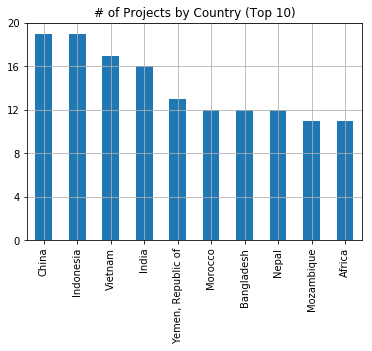

In [9]:
top_10_countries.plot.bar(legend=False, title='# of Projects by Country (Top 10)', yticks=(0, 4, 8, 12, 16, 20), grid=True)

In [10]:
# (Q2) Find the top 10 major project themes (using column 'mjtheme_namecode')
# (Q3) Above you will notice that some entries have only the code and the name is missing. Create a dataframe with the missing names filled in.

# Normalize the 'mjtheme_namecode' within data to see what we're working with
norm = json_normalize(data, 'mjtheme_namecode')
norm

,code,name
0,8,Human development
1,11,
2,1,Economic management
3,6,Social protection and risk management
4,5,Trade and integration
5,2,Public sector governance
6,11,Environment and natural resources management
7,6,Social protection and risk management
8,7,Social dev/gender/inclusion
9,7,Social dev/gender/inclusion


In [11]:
# Looks like there are many missing values... let's clean this up and find our top 10 major project themes
# Sort norm: normalized
normalized = norm.sort_values(['name', 'code'])
normalized

,code,name
212,1,
363,1,
1024,1,
1114,1,
1437,1,
121,10,
165,10,
217,10,
275,10,
391,10,


In [12]:
# Create a df of correct pairs of terms: theme_df
theme_df = normalized.drop_duplicates().iloc[11:, :].reset_index()
theme_df

,index,code,name
0,2,1,Economic management
1,6,11,Environment and natural resources management
2,11,4,Financial and private sector development
3,0,8,Human development
4,5,2,Public sector governance
5,252,3,Rule of law
6,18,10,Rural development
7,8,7,Social dev/gender/inclusion
8,3,6,Social protection and risk management
9,4,5,Trade and integration


In [13]:
# Pop off the old, unneeded index column
theme_df.pop('index')
theme_df

,code,name
0,1,Economic management
1,11,Environment and natural resources management
2,4,Financial and private sector development
3,8,Human development
4,2,Public sector governance
5,3,Rule of law
6,10,Rural development
7,7,Social dev/gender/inclusion
8,6,Social protection and risk management
9,5,Trade and integration


In [14]:
# Now let's join the theme_df and original norm to match on the code column, 'filling' the old column
new_normalized = pd.merge(norm, theme_df, left_on='code', right_on='code', how='left', suffixes = ['_old_name', '_new_name'])
new_normalized

,code,name_old_name,name_new_name
0,8,Human development,Human development
1,11,,Environment and natural resources management
2,1,Economic management,Economic management
3,6,Social protection and risk management,Social protection and risk management
4,5,Trade and integration,Trade and integration
5,2,Public sector governance,Public sector governance
6,11,Environment and natural resources management,Environment and natural resources management
7,6,Social protection and risk management,Social protection and risk management
8,7,Social dev/gender/inclusion,Social dev/gender/inclusion
9,7,Social dev/gender/inclusion,Social dev/gender/inclusion


In [15]:
# Perfect, the missing values are filled. Let's clean the new_normalized by removing the old inner column
new_normalized.pop('name_old_name')
new_normalized

,code,name_new_name
0,8,Human development
1,11,Environment and natural resources management
2,1,Economic management
3,6,Social protection and risk management
4,5,Trade and integration
5,2,Public sector governance
6,11,Environment and natural resources management
7,6,Social protection and risk management
8,7,Social dev/gender/inclusion
9,7,Social dev/gender/inclusion


In [16]:
# Addressing Q2, let's see what the top 10 project were
# Let's make a bar chart of the counts of each project theme name, similar to Q1
top_10_projects = pd.DataFrame(new_normalized['name_new_name'].value_counts().head(10))
top_10_projects

,name_new_name
Environment and natural resources management,250
Rural development,216
Human development,210
Public sector governance,199
Social protection and risk management,168
Financial and private sector development,146
Social dev/gender/inclusion,130
Trade and integration,77
Urban development,50
Economic management,38


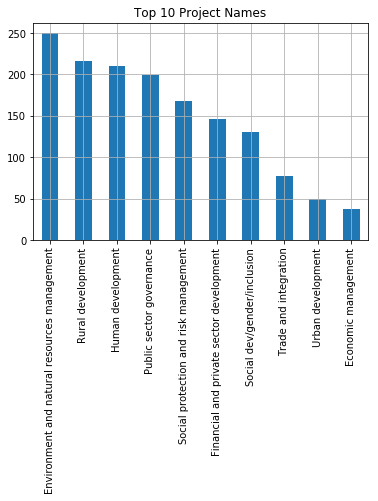

In [17]:
top_10_projects.plot.bar(legend=False, title='Top 10 Project Names', yticks=(0, 50, 100, 150, 200, 250), grid=True)